In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/GB500

/content/drive/MyDrive/GB500


In [3]:
# -*- coding: utf-8 -*-

train_img = False

import glob
import numpy as np
import tensorflow as tf
import nibabel as nib

import keras.backend as K
from keras.models import load_model

from utils_load import get_images, image_preprocess, test_image, plot_images

if train_img:
  hd = np.asarray([45 , 25, 40 , 40 , 13, 40, 42 , 33, 6 , 43 , 37 , 8 , 28, 18, 46 , 37, 41 , 41 ]) #, 33, 33 ])
  hu = np.asarray([112, 95, 113, 116, 91, 98, 109, 98, 67, 105, 104, 81, 97, 88, 103, 90, 110, 113]) #, 92, 101])

  x_train = sorted(glob.glob('data_heart/imagesTr/*'))
  y_train = sorted(glob.glob('data_heart/labelsTr/*'))
else:
  hd = np.asarray([33, 33 ])
  hu = np.asarray([92, 101])

  x_train = sorted(glob.glob('data_heart/imagesVal/*'))
  y_train = sorted(glob.glob('data_heart/labelsVal/*'))

img_xtrain = get_images(x_train,hd,hu)
img_ytrain = get_images(y_train,hd,hu)

size_img = 256

valid_X, valid_ground = image_preprocess(img_xtrain, img_ytrain)

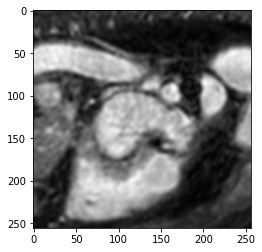

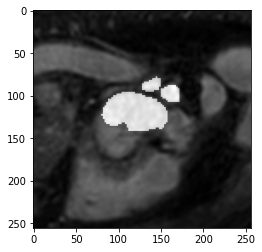

In [7]:
from utils import unir_imagem
img_number = 10

plot_images(valid_X,size_img,size_img,img_number)
unir_imagem(valid_X, valid_ground,img_number, size_img)

./outputs_unet_ACMLoss/
Rodando pela 0 vez
4/4 [==============================] - 41s 10s/step
0.9279129736448151


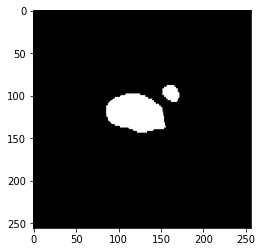

Acabou a Leitura
Rodando pela 1 vez
4/4 [==============================] - 41s 10s/step
0.9287456053111042


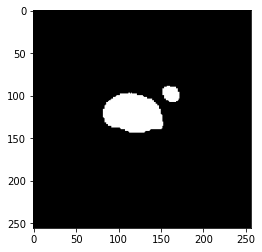

Acabou a Leitura
Rodando pela 2 vez
4/4 [==============================] - 41s 10s/step
0.9252398618811938


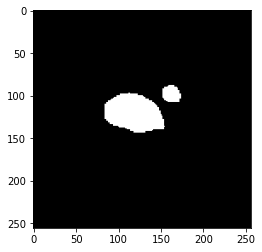

Acabou a Leitura
Rodando pela 3 vez
4/4 [==============================] - 43s 11s/step
0.932069661352486


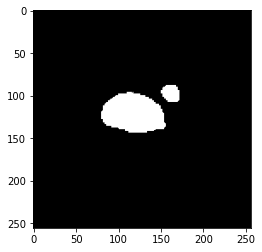

Acabou a Leitura
Rodando pela 4 vez
4/4 [==============================] - 41s 10s/step
0.9245430173044114


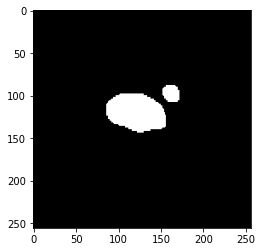

Acabou a Leitura
./outputs_unet_ACMLoss/
Rodando pela 0 vez
4/4 [==============================] - 41s 10s/step
0.9279129736448151


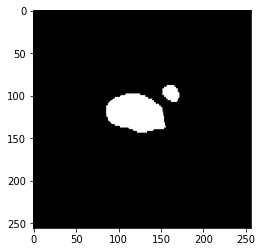

Acabou a Leitura
Rodando pela 1 vez
4/4 [==============================] - 41s 10s/step
0.9287456053111042


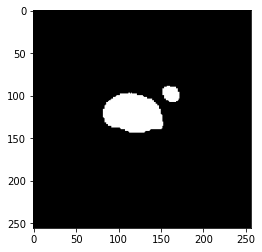

Acabou a Leitura
Rodando pela 2 vez
4/4 [==============================] - 41s 10s/step
0.9252398618811938


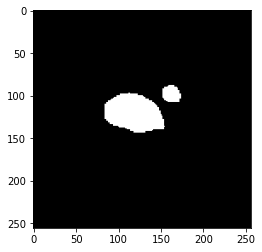

Acabou a Leitura
Rodando pela 3 vez
4/4 [==============================] - 43s 11s/step
0.932069661352486


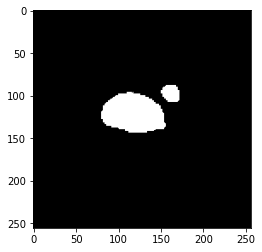

Acabou a Leitura
Rodando pela 4 vez
4/4 [==============================] - 40s 10s/step
0.9245430173044114


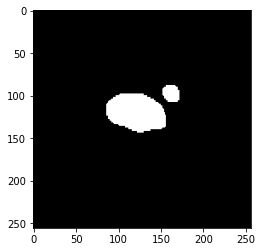

Acabou a Leitura
./outputs_unet_ACMLoss/
Rodando pela 0 vez
4/4 [==============================] - 41s 10s/step
0.9279129736448151


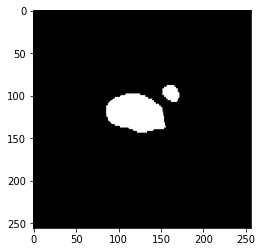

Acabou a Leitura
Rodando pela 1 vez
4/4 [==============================] - 47s 12s/step
0.9287456053111042


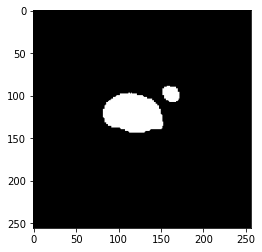

Acabou a Leitura
Rodando pela 2 vez
4/4 [==============================] - 44s 10s/step
0.9252398618811938


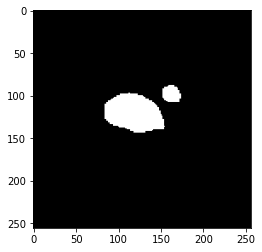

Acabou a Leitura
Rodando pela 3 vez


KeyboardInterrupt: ignored

In [ ]:
from utils_load import dice_coef, dice_coef_loss, Active_Contour_Loss

base_folders = ['./outputs_unet_resnet34/', './outputs_unet_resnet50/', './outputs_unet_resnet101/', './outputs_unet_ACMLoss/']

for i in range(len(base_folders)):
  selection = 3

  base_folder = base_folders[selection]
  
  print(base_folder)
  
  custom_objects = [
      {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
      {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
      {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
      {'Active_Contour_Loss': Active_Contour_Loss, 'dice_coef' : dice_coef}
      ][selection]
  tam_models = 5 #[10, 10][selection]

  dice_metric = []
  for i in range(tam_models):
      num = i
      print("Rodando pela %i vez"%(i))
      
      model = load_model(base_folder + 'Heart_Model_%i.h5'%(num), custom_objects = custom_objects)
      
      predicao = model.predict(valid_X)
      predicao = predicao > 0.5
      #predict_vol = make_vol(predicao, index_test_y)
      predicao = np.float64(predicao)

      dice_metric.append(dice_coef(predicao, valid_ground).numpy())
      print(dice_metric[num])
      
      K.clear_session()
      
      img_number = 10

      #plot_images(valid_X,size_img,size_img,img_number)
      plot_images(predicao,size_img,size_img,img_number)
      #plot_images(valid_ground,size_img,size_img,img_number, save = True)
      
      #unir_imagem(valid_X, valid_ground,img_number, size_img, f"{base_folder}images/GT_img{img_number}_exec{num}")
      #unir_imagem(valid_X, predicao, img_number, size_img, f"{base_folder}images/pred_img{img_number}_exec{num}")

      #save_nifti(predict_vol, "imagem_%i"%(num))
      
      print("Acabou a Leitura")

  np.savetxt(base_folder + 'Dice_Metric_prod.txt', dice_metric)

  with open(base_folder + 'mean_median_results.txt', 'w') as f:
      f.write("Dices dos Volumes: " + str(dice_metric))
      f.write('\n')
      f.write("Media: " + str(np.mean(dice_metric)))
      f.write('\n')
      f.write("Mediana: " + str(np.median(dice_metric)))
      f.write('\n')
      f.write("Maximo: " + str(np.max(dice_metric)))
      f.write('\n')
      f.write("Minimo: " + str(np.min(dice_metric)))

In [ ]:
model = load_model(base_folder + 'Heart_Model_%i.h5'%(num), custom_objects = custom_objects)
    
predicao = model.predict(valid_X)